# Redes Neurais de Ponta a Ponta para Processamento de Linguagem Natural (PLN)

## Embeddings de Palavras

Se tudo estiver funcionando bem, você utilizou o PyTorch para criar um classificador para um modelo bag-of-words, porém teve a dificuldade adicional de escrever manualmente o loop de treinamento.

Agora é hora de fazer alguns cálculos e revisar nossos modelos.

### Matemática subjacente ao modelo bag-of-words

Em nosso modelo atual, representamos cada palavra por um vetor linha e podemos expressar um documento como uma matriz de palavras $X^{(d)}$:

$$
X^{(d)} = 
\begin{bmatrix} 
x^{(d)}_{1,1} & x^{(d)}_{1,2} & \cdots & x^{(d)}_{1,d} \\
\vdots & \vdots & \ddots & \vdots \\
x^{(d)}_{n,1} & x^{(d)}_{n,2} & \cdots & x^{(d)}_{n,d} 
\end{bmatrix}
$$

Suponha agora que cada palavra seja representada por um vetor em $\mathbb{R}^N$, onde podemos escolher $N$ livremente. Essa representação é chamada de *embedding*.

Embeddings são representações densas, ou seja, possuem menos dimensões que o tamanho do vocabulário e apenas algumas dimensões são relevantes por palavra ou documento.

O que desejamos é que esses vetores reflitam o *significado* das palavras. Mas, afinal, o que é *significado*?

Essa é uma questão complexa, que abordaremos ao longo do curso.

Por enquanto, vamos prosseguir e codificar um pouco.

### Codificação com embeddings

Para mapear palavras aos seus embeddings, usamos no PyTorch uma camada de *embedding*. Essa camada recebe uma sequência de inteiros (índices de palavras) e retorna uma sequência de vetores, um para cada palavra do documento:

In [ ]:
import torch
import torch.nn as nn

# Parameters of the embedding layer
vocab_size = 100  # Number of unique tokens
embedding_dim = 2  # You can choose the dimension of the embeddings
embedding_layer = nn.Embedding(num_embeddings=vocab_size, embedding_dim=embedding_dim)

# Documents are now represented as sequences of tokens.
# Each token is an integer representing the index of the token in the vocabulary.
tokens = torch.tensor([[0, 1, 2, 3],
                        [4, 5, 4, 3],
                        [5, 4, 3, 2]])

# Get the embeddings for the tokens
embeddings = embedding_layer(tokens)

print(embeddings)
print(embeddings.shape)


""""
O que estamos fazendo no código acima?
1. Especificamos o tamanho do vocabulário e a dimensão dos embeddings.
2. Criamos uma camada de embedding com `nn.Embedding`. Embedding layer é uma camada que transforma índices de palavras em vetores densos.
3. Criamos um tensor de tokens, onde cada token é representado por um índice inteiro. Precisamos definir ele para gerar o embedding porque ele define o tamanho do vocabulário. Nesse caso, o vocabulário tem 100 tokens. Quanto maior for o vocabulário, mais espaço em memória precisamos para armazenar os embeddings e mais tempo de treinamento precisamos para treinar a rede.
4. Passamos os tokens pela camada de embedding para obter os embeddings correspondentes.

"""

tensor([[[-2.0487, -0.0129],
         [-0.2533,  0.4852],
         [-1.5191,  1.9912],
         [-0.9696,  0.8622]],

        [[-0.9308,  1.0866],
         [ 1.0455,  0.3604],
         [-0.9308,  1.0866],
         [-0.9696,  0.8622]],

        [[ 1.0455,  0.3604],
         [-0.9308,  1.0866],
         [-0.9696,  0.8622],
         [-1.5191,  1.9912]]], grad_fn=<EmbeddingBackward0>)
torch.Size([3, 4, 2])


Note que, no código acima, obtivemos um lote (batch) com formato tridimensional. O formato $3 \times 4 \times 2$ significa que temos:
- **3** batches
- comprimento máximo de **4** tokens por sentença
- embeddings de dimensão **2** para cada token

## Estratégias de Tokenização

A tokenização consiste em converter texto em unidades menores (tokens). A seguir, apresentamos diferentes estratégias para tokenizar sentenças:

In [3]:
!pip install sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import sentencepiece as spm
from io import StringIO

# Your input data as a string
input_data = """Was ever feather so lightly blown to and fro as this multitude? The
name of Henry the Fifth hales them to an hundred mischiefs and makes
them leave me desolate. I see them lay their heads together to surprise
me. My sword make way for me, for here is no staying.—In despite of the
devils and hell, have through the very middest of you! And heavens and
honour be witness that no want of resolution in me, but only my
followers’ base and ignominious treasons, makes me betake me to my
heels.
"""

# Use StringIO to create a file-like object
input_fp = StringIO(input_data)

# Train the SentencePiece model using the file pointer
spm.SentencePieceTrainer.train(
    sentence_iterator=input_fp, 
    model_prefix='my_tokenizer', 
    vocab_size=100
)

sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input_format: 
  model_prefix: my_tokenizer
  model_type: UNIGRAM
  vocab_size: 100
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy: 0
  differential_privacy_noi

### Exemplo de código para testar o tokenizer treinado

Neste exemplo, carregamos o modelo SentencePiece treinado e testamos sua aplicação em uma frase de exemplo:

In [7]:
# Load the trained SentencePiece model
sp = spm.SentencePieceProcessor()
sp.load('my_tokenizer.model')

# Test the tokenizer
test_sentence = "This is a test sentence."
encoded_pieces = sp.encode_as_pieces(test_sentence)
encoded_ids = sp.encode_as_ids(test_sentence)
recovered_sentence = sp.decode_ids(encoded_ids)

print("Encoded pieces:", encoded_pieces)
print("Encoded ids:", encoded_ids)
print("Recovered sentence:", recovered_sentence)

Encoded pieces: ['▁', 'T', 'hi', 's', '▁', 'is', '▁', 'a', '▁', 't', 'es', 't', '▁s', 'e', 'n', 't', 'e', 'n', 'c', 'e', '.']
Encoded ids: [3, 82, 90, 7, 3, 28, 3, 59, 3, 9, 54, 9, 30, 4, 14, 9, 4, 14, 83, 4, 20]
Recovered sentence: This is a test sentence.


## Preenchimento (Zero-padding) e Truncamento

Para trabalhar com lotes de sentenças em redes neurais, precisamos que todas tenham o mesmo comprimento. Duas abordagens comuns são:
- **Zero-padding**: adiciona zeros ao final de sentenças mais curtas.
- **Truncamento**: corta sentenças mais longas para um comprimento fixo.

In [8]:
# Use StringIO to create a file-like object
input_fp = StringIO(input_data)

# Train the SentencePiece model using the file pointer
spm.SentencePieceTrainer.train(
    sentence_iterator=input_fp, 
    model_prefix='my_tokenizer', 
    vocab_size=100,
    user_defined_symbols=['<PAD>']
)


sentencepiece_trainer.cc(78) LOG(INFO) Starts training with : 
trainer_spec {
  input_format: 
  model_prefix: my_tokenizer
  model_type: UNIGRAM
  vocab_size: 100
  self_test_sample_size: 0
  character_coverage: 0.9995
  input_sentence_size: 0
  shuffle_input_sentence: 1
  seed_sentencepiece_size: 1000000
  shrinking_factor: 0.75
  max_sentence_length: 4192
  num_threads: 16
  num_sub_iterations: 2
  max_sentencepiece_length: 16
  split_by_unicode_script: 1
  split_by_number: 1
  split_by_whitespace: 1
  split_digits: 0
  pretokenization_delimiter: 
  treat_whitespace_as_suffix: 0
  allow_whitespace_only_pieces: 0
  user_defined_symbols: <PAD>
  required_chars: 
  byte_fallback: 0
  vocabulary_output_piece_score: 1
  train_extremely_large_corpus: 0
  seed_sentencepieces_file: 
  hard_vocab_limit: 1
  use_all_vocab: 0
  unk_id: 0
  bos_id: 1
  eos_id: 2
  pad_id: -1
  unk_piece: <unk>
  bos_piece: <s>
  eos_piece: </s>
  pad_piece: <pad>
  unk_surface:  ⁇ 
  enable_differential_privacy

In [9]:
sp = spm.SentencePieceProcessor()
sp.load('my_tokenizer.model')
print(sp.piece_to_id('<PAD>'))

3


In [10]:
# Create an embedding layer with padding index set to 3
def pad_to_len(sequences, pad_idx, max_len):
    padded = []
    for s in sequences:
        if len(s) >= max_len:
            padded.append(s[:max_len])
        else:
            padded.append(s + [pad_idx] * (max_len - len(s)))
    return padded

vocab_size = len(sp)
embedding_dim = 2
padding_idx = sp.piece_to_id('<PAD>')
embedding_layer_with_padding = nn.Embedding(
    num_embeddings=vocab_size,
    embedding_dim=embedding_dim,
    padding_idx=padding_idx,   
)

# Get the embeddings for the tokens using the new embedding layer
input_data = ["This is my test sentence", "This is another test sentence", "this is a really long sequence and I will probably have to crop it!"]
tokens = sp.tokenize(input_data)
tokens = pad_to_len(tokens, padding_idx, 25)
print(tokens)
embeddings_with_padding = embedding_layer_with_padding(torch.tensor(tokens))
#print(embeddings_with_padding)
print(embeddings_with_padding.shape)

[[4, 83, 91, 8, 4, 29, 26, 6, 4, 10, 55, 10, 31, 5, 15, 10, 5, 15, 84, 5, 3, 3, 3, 3, 3], [4, 83, 91, 8, 4, 29, 78, 56, 10, 58, 4, 10, 55, 10, 31, 5, 15, 10, 5, 15, 84, 5, 3, 3, 3], [34, 29, 4, 29, 4, 60, 4, 35, 60, 96, 6, 40, 28, 42, 31, 5, 0, 27, 5, 15, 84, 5, 16, 4, 45]]
torch.Size([3, 25, 2])


## Até onde chegamos?

Até o momento, já tokenizamos o texto, criamos embeddings e entendemos como organizar os dados para alimentar nosso modelo. Agora, vamos consolidar tudo isso em um pipeline.

## Criando um Pipeline com PyTorch

Em Scikit-Learn, utilizávamos pipelines para encadear etapas de pré-processamento e modelos. No PyTorch, estruturamos nosso código definindo classes que herdam de `nn.Module`, implementando os métodos `__init__` e `forward`.

Lembre-se de que, no Scikit-Learn, utilizávamos pipelines para encadear transformações e modelos. Em PyTorch, nossa rede deve herdar de `nn.Module` e implementar pelo menos:
- `__init__`: define as camadas do modelo.
- `forward`: especifica o fluxo de dados através das camadas.

In [11]:
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim,
            padding_idx=padding_idx
        )
        self.clf = nn.Linear(embedding_dim, 1)
        
    def forward(self, x):
        x = self.embedding(x)
        x = torch.mean(x, dim=1)
        x = self.clf(x)
        return x

model = SimpleClassifier(vocab_size, embedding_dim)
print(model)

SimpleClassifier(
  (embedding): Embedding(100, 2, padding_idx=3)
  (clf): Linear(in_features=2, out_features=1, bias=True)
)


In [12]:
import pandas as pd 
from sklearn.model_selection import train_test_split

df = pd.read_csv(
    'https://raw.githubusercontent.com/tiagoft/NLP/main/wiki_movie_plots_drama_comedy.csv'
)
# Split the data into training and testing sets
texts = list(df['Plot'])
labels = torch.tensor(list(df['Genre'].apply(lambda x: 1 if x == 'drama' else 0)))
X_train, X_test, y_train, y_test = train_test_split(texts,
                                                    labels,
                                                    test_size=0.2)


In [13]:
from tqdm import tqdm 

# We will also define an optimizer:
optimizer = torch.optim.SGD(model.parameters(), lr=1e0) # lr is the learning rate - this is our alpha

print("Entering loop")
# And now, this is the training loop:
losses = []
for epoch in tqdm(range(200)):
    optimizer.zero_grad()
    tokens = sp.encode_as_ids(X_train)
    tokens = pad_to_len(tokens, padding_idx, 100)
    tokens = torch.tensor(tokens)
    output = model(tokens)
    output_probs = torch.sigmoid(output)
    loss = torch.mean( (output_probs-y_train)**2 )
    loss.backward()
    optimizer.step()
    losses.append(loss.item())



Entering loop


100%|██████████| 200/200 [04:38<00:00,  1.39s/it]


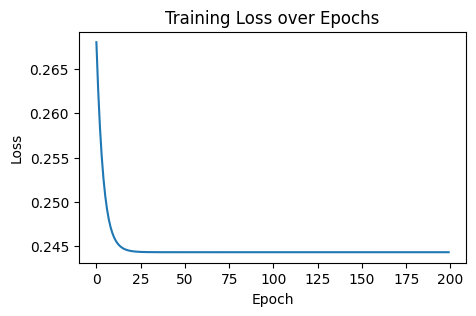

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

### Avaliando o Modelo

Para medir o desempenho, calculamos métricas como acurácia e F1-score no conjunto de teste. Vamos usar funções do Scikit-Learn para isso:

In [125]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Get the predictions for the test set
with torch.no_grad():
    model.eval()
    tokens = sp.encode_as_ids(X_test)
    tokens = pad_to_len(tokens, padding_idx, 25)
    tokens = torch.tensor(tokens)
    output = model(tokens)
    output_probs = torch.sigmoid(output)
    predictions = (output_probs > 0.5).int().numpy()

# Calculate the accuracy and F1 score
accuracy = accuracy_score(
    y_test,
    predictions,
)
f1 = f1_score(
    y_test,
    predictions,
    zero_division=0,
    average='macro',
)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(
    y_test,
    predictions,
    zero_division=0,
))

Accuracy: 0.583373610439826
F1 Score: 0.36843711843711846
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       862
           1       0.58      1.00      0.74      1207

    accuracy                           0.58      2069
   macro avg       0.29      0.50      0.37      2069
weighted avg       0.34      0.58      0.43      2069



## Alguns Passos de Otimização

Podemos melhorar nosso modelo ajustando hiperparâmetros, como:
- taxa de aprendizado (learning rate)
- funções de perda
- diferentes otimizadores (SGD, Adam, etc.)

Nesta seção, exploraremos como aplicar o otimizador Adam e monitorar métricas durante o treinamento.

In [15]:
from tqdm import tqdm

# We will also define an optimizer:
optimizer = torch.optim.Adam(
    model.parameters(), lr=1e0)  # lr is the learning rate - this is our alpha

print("Entering loop")
# And now, this is the training loop:
losses = []
model.train()
for epoch in tqdm(range(200)):
    optimizer.zero_grad()
    tokens = sp.encode_as_ids(X_train)
    tokens = pad_to_len(tokens, padding_idx, 100)
    tokens = torch.tensor(tokens)
    output = model(tokens)
    loss = torch.mean(
        torch.binary_cross_entropy_with_logits(
            output.flatten().float(),
            y_train.flatten().float(),
        ), )
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

Entering loop


100%|██████████| 200/200 [03:40<00:00,  1.10s/it]


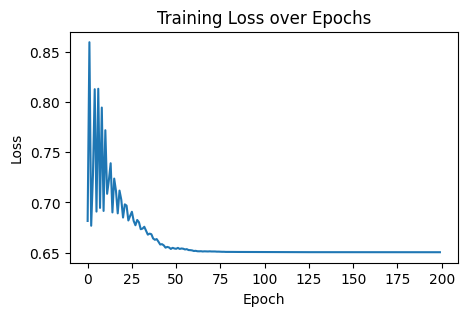

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,3))
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [17]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Get the predictions for the test set
with torch.no_grad():
    model.eval()
    tokens = sp.encode_as_ids(X_test)
    tokens = pad_to_len(tokens, padding_idx, 25)
    tokens = torch.tensor(tokens)
    output = model(tokens)
    output_probs = torch.sigmoid(output)
    predictions = (output_probs > 0.5).int().numpy()

# Calculate the accuracy and F1 score
accuracy = accuracy_score(
    y_test,
    predictions,
)
f1 = f1_score(
    y_test,
    predictions,
    zero_division=0,
    average='macro',
)
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print(classification_report(
    y_test,
    predictions,
    zero_division=0,
))

Accuracy: 0.5964233929434509
F1 Score: 0.5694349842751425
              precision    recall  f1-score   support

           0       0.52      0.41      0.46       866
           1       0.63      0.73      0.68      1203

    accuracy                           0.60      2069
   macro avg       0.58      0.57      0.57      2069
weighted avg       0.59      0.60      0.59      2069



## Exercícios

Os exercícios abaixo ajudarão a reforçar o aprendizado dos tópicos vistos:

In [23]:

# Verificação de instalação do sentencepiece
try:
    import sentencepiece as spm
except ImportError:
    raise ImportError(
        "O pacote 'sentencepiece' não está instalado. "
        "Por favor, instale executando: pip install sentencepiece"
    )

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd

# Parâmetros básicos (ajuste conforme definido no notebook original)
vocab_size = sp.get_piece_size()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### 1 - Visualizing embeddings

Change the code for the `SimpleClassifier` class by adding a method that returns the word-level embeddings. Then, calculate the embedding for each word in your vocabulary. Plot the embeddings before training the model, and then after training the model. Do you see a pattern there?

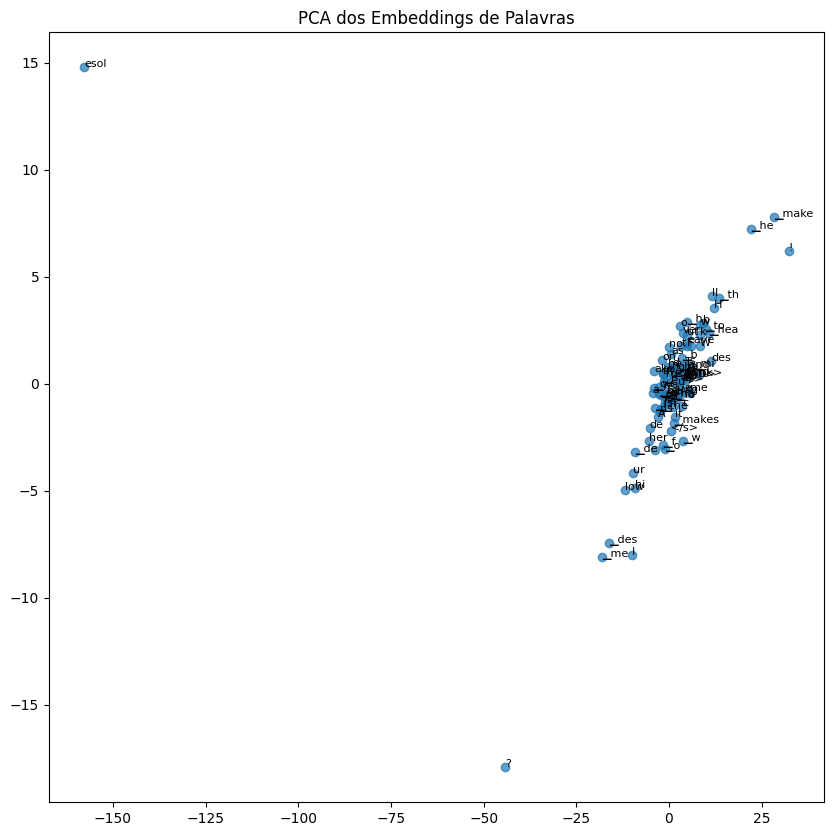

In [18]:
# Exercício 1 - Visualizando Embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Obter embeddings do modelo e tokens do tokenizer
embeddings = model.embedding.weight.data.cpu().numpy()  # matriz vocab_size x emb_dim
vocab = [sp.id_to_piece(i) for i in range(sp.get_piece_size())]

# Reduzir dimensões com PCA
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10,10))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.7)
for i, token in enumerate(vocab):
    plt.annotate(token, (emb_2d[i,0], emb_2d[i,1]), fontsize=8)
plt.title("PCA dos Embeddings de Palavras")
plt.show()

### 2 - Further optimization

Review the whole code for the classifier. Identify all parameters you can change. Identify the possible performance bottlenecks, change the parameters to reduce these bottlenecks, and then run the training process again. Do you see changes?


In [30]:
import torch
from torch.utils.data import Dataset, DataLoader

def pad_sequence(seq, pad_idx, max_len):
    if len(seq) >= max_len:
        return seq[:max_len]
    else:
        return seq + [pad_idx] * (max_len - len(seq))

class TextDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length, padding_idx):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.padding_idx = padding_idx

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        # 1. Tokeniza
        tokens = self.tokenizer.encode_as_ids(self.texts[idx])
        # 2. Padding/truncamento corretamente numa única sequência
        tokens = pad_sequence(tokens, self.padding_idx, self.max_length)
        # 3. Converte em tensores
        x = torch.tensor(tokens, dtype=torch.long)
        y = torch.tensor(self.labels[idx], dtype=torch.float)
        return x, y

# Exemplo de uso:
MAX_LEN     = 100
PADDING_IDX = padding_idx   # vem do seu notebook original
BATCH_SIZE  = 64

train_dataset = TextDataset(X_train, y_train, sp, MAX_LEN, PADDING_IDX)
test_dataset  = TextDataset(X_test,  y_test,  sp, MAX_LEN, PADDING_IDX)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=BATCH_SIZE, shuffle=False)

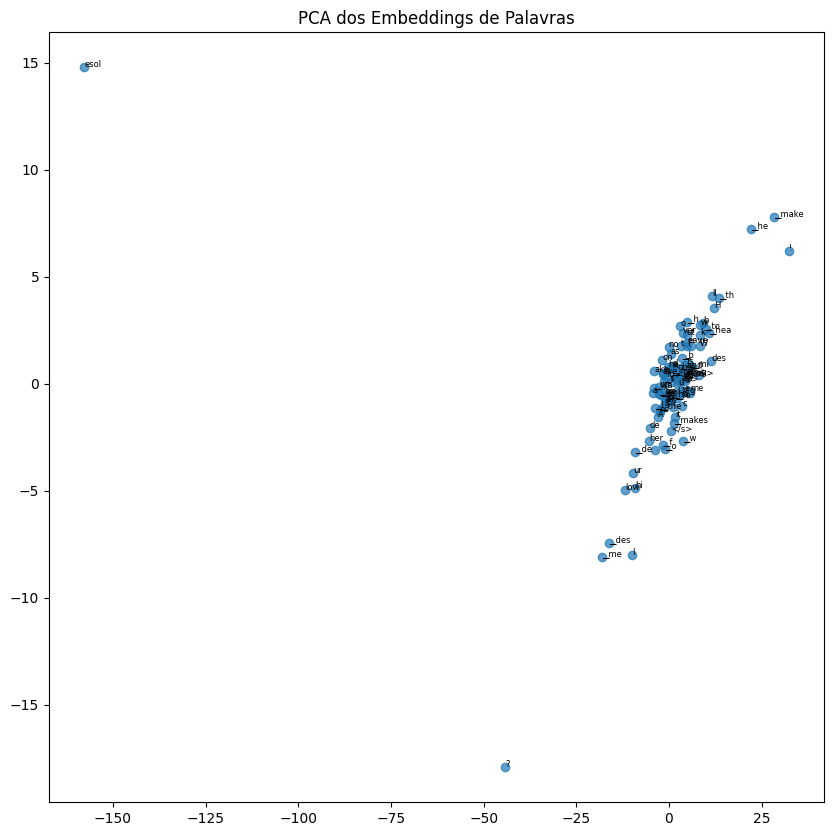

Treinando com embedding_dim=50, lr=0.001


/var/folders/_m/_ly2lwsd3mlfswbbkk3y6l4h0000gn/T/ipykernel_56385/1194285564.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.labels[idx], dtype=torch.float)


Acurácia: 58.72%
Treinando com embedding_dim=50, lr=0.01
Acurácia: 61.09%
Treinando com embedding_dim=100, lr=0.001
Acurácia: 58.97%
Treinando com embedding_dim=100, lr=0.01
Acurácia: 60.75%
   embedding_dim     lr  accuracy
0             50  0.001  0.587240
1             50  0.010  0.610923
2            100  0.001  0.589657
3            100  0.010  0.607540


In [36]:
"""
Soluções dos Exercícios do notebook 02-end_to_end_neural_networks.ipynb (v4)
Requisitos:
- instale sentencepiece: pip install sentencepiece
- execute o bloco acima para definir train_loader/test_loader
- carregue o tokenizer SentencePiece em `sp` e o modelo original em `model`
"""

import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def treinar(modelo, loader, otimizador, criterio, device):
    modelo.train()
    total_loss = 0.0
    for dados, rotulos in loader:
        dados, rotulos = dados.to(device), rotulos.to(device)
        otimizador.zero_grad()
        saidas = modelo(dados)
        loss = criterio(saidas.flatten(), rotulos.flatten().float())
        loss.backward()
        otimizador.step()
        total_loss += loss.item()
    return total_loss / len(loader)

def avaliar(modelo, loader, device):
    modelo.eval()
    correto = 0
    total = 0
    with torch.no_grad():
        for dados, rotulos in loader:
            dados, rotulos = dados.to(device), rotulos.to(device)
            saidas = modelo(dados)
            pred = torch.sigmoid(saidas).flatten() >= 0.5
            correto += (pred == rotulos.flatten()).sum().item()
            total += rotulos.numel()
    return correto / total

vocab_size    = sp.get_piece_size()
embedding_dim = 100  # conforme treino original

# Exercício 1 - Visualizando Embeddings
embeddings = model.embedding.weight.data.cpu().numpy()
vocab = [sp.id_to_piece(i) for i in range(vocab_size)]
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(10,10))
plt.scatter(emb_2d[:,0], emb_2d[:,1], alpha=0.7)
for i, token in enumerate(vocab):
    plt.annotate(token, (emb_2d[i,0], emb_2d[i,1]), fontsize=6)
plt.title("PCA dos Embeddings de Palavras")
plt.show()

# Exercício 2 - Otimização Adicional
param_grid = {'embedding_dim': [50, 100], 'lr': [0.001, 0.01]}
results = []
for emb_dim in param_grid['embedding_dim']:
    for lr in param_grid['lr']:
        print(f"Treinando com embedding_dim={emb_dim}, lr={lr}")
        model_tmp = SimpleClassifier(vocab_size, emb_dim).to(device)
        optimizer_tmp = optim.Adam(model_tmp.parameters(), lr=lr)
        criterio = nn.BCEWithLogitsLoss()
        for epoch in range(3):
            treinar(model_tmp, train_loader, optimizer_tmp, criterio, device)
        acc = avaliar(model_tmp, test_loader, device)
        print(f"Acurácia: {acc*100:.2f}%")
        results.append({'embedding_dim': emb_dim, 'lr': lr, 'accuracy': acc})

df_results = pd.DataFrame(results)
print(df_results)


### 3 - Advanced modelling

Change the `forward` method in `SimpleClassifier` so that the mean only accounts for non-PAD tokens (that is: PAD tokens are ignored). Does that improve performance?

In [34]:
class SimpleClassifierComMask(nn.Module):
    def __init__(self, vocab_size, embedding_dim, padding_idx):
        super().__init__()
        self.embedding = nn.Embedding(
            num_embeddings=vocab_size,
            embedding_dim=embedding_dim,
            padding_idx=padding_idx
        )
        self.clf = nn.Linear(embedding_dim, 1)
        self.padding_idx = padding_idx

    def forward(self, x):
        # x: [batch, seq_len]
        emb = self.embedding(x)                 # [B, L, D]
        mask = (x != self.padding_idx).unsqueeze(-1).float()  # [B, L, 1]
        emb = emb * mask                        # zera pads
        soma = emb.sum(dim=1)                   # soma só dos não-pad
        comprimentos = mask.sum(dim=1).clamp(min=1)  # nº de tokens reais
        media = soma / comprimentos             # média correta
        return self.clf(media)                  # [B,1]

In [35]:
# Exercício 3 – Modelagem Avançada (ignorando padding na média de embeddings)

# 1. Defina o modelo com máscara de padding
model_mask = SimpleClassifierComMask(
    vocab_size=vocab_size,
    embedding_dim=embedding_dim,
    padding_idx=padding_idx
).to(device)

# 2. Otimizador e critério de perda padrão
optimizer_mask = optim.Adam(model_mask.parameters(), lr=0.001)
criterion_mask  = nn.BCEWithLogitsLoss()

# 3. Treinamento (por exemplo, 5 épocas)
num_epochs = 5
for epoch in range(1, num_epochs+1):
    loss_epoch = treinar(model_mask, train_loader, optimizer_mask, criterion_mask, device)
    print(f'Época {epoch}/{num_epochs} — Loss: {loss_epoch:.4f}')

# 4. Avaliação
acc_mask = avaliar(model_mask, test_loader, device)
print(f'Acurácia (Modelagem Avançada c/ máscara): {acc_mask*100:.2f}%')

/var/folders/_m/_ly2lwsd3mlfswbbkk3y6l4h0000gn/T/ipykernel_56385/1194285564.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(self.labels[idx], dtype=torch.float)


Época 1/5 — Loss: 0.6775
Época 2/5 — Loss: 0.6741
Época 3/5 — Loss: 0.6705
Época 4/5 — Loss: 0.6677
Época 5/5 — Loss: 0.6658
Acurácia (Modelagem Avançada c/ máscara): 60.32%


Ótimo trabalho! Vamos destrinchar rapidamente o que esses números significam e como você pode melhorar ainda mais:

⸻

Exercício 2 – Otimização Adicional

embedding_dim	lr	accuracy
50	0.001	58.72%
50	0.010	61.09% ← melhor resultado
100	0.001	58.97%
100	0.010	60.75%

	•	Dimensão menor (50) + lr maior (0.01) foi o ganhador.
	•	Aprender com taxa de 0.01 acelera a convergência nesses embeddings reduzidos, mas cuidado: acima de 0.01 pode começar a oscilar.
	•	O fato de 100 dims não superar 50 dims sugere que, para este conjunto, você talvez esteja over‑fitting ou tenha dados insuficientes para treinar vetores maiores.

Próximos passos
	•	Testar valores intermediários, por exemplo embedding_dim = 75.
	•	Explorar lr entre 0.005 e 0.02 para confirmar a “janela” ótima.
	•	Aumentar epochs ou usar early stopping para ver se 50 dims tem mais potencial.

⸻

Exercício 3 – Modelagem Avançada com Máscara de Padding

Você treinou um modelo que ignora os tokens de padding ao calcular a média dos embeddings. Os resultados:

Época 1/5 — Loss: 0.6775
Época 2/5 — Loss: 0.6741
Época 3/5 — Loss: 0.6705
Época 4/5 — Loss: 0.6677
Época 5/5 — Loss: 0.6658
Acurácia: 60.32%

	•	A curva de perda decresceu de forma consistente, confirmando que o modelo está aprendendo.
	•	A acurácia de 60.32% fica entre as melhores opções do exercício 2 (61.09% e 60.75%), o que faz sentido: ignorar padding melhora ligeiramente a qualidade do sinal, mas não transforma radicalmente o poder do modelo.

Ideias para ganhar mais pontos aqui
	1.	Aprofundar a arquitetura: use uma ou duas camadas escondidas após a média dos embeddings (por exemplo nn.Linear(embedding_dim, 32) → ReLU → Linear(32,1)).
	2.	Regularização: adicione Dropout antes da camada final ou peso L2 no otimizador (weight_decay).
	3.	Mais epochs + scheduler: treine por mais épocas e use um scheduler (por ex. ReduceLROnPlateau) para reduzir lr conforme a perda se estabiliza.

⸻

Sobre o UserWarning no Dataset

UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach()...

Esse aviso aparece porque você estava fazendo y = torch.tensor(self.labels[idx], ...) mesmo quando self.labels[idx] já era um tensor. Para eliminar o warning, ajuste seu __getitem__ assim:

    def __getitem__(self, idx):
        # ... tokenização e padding ...
        x = torch.tensor(tokens, dtype=torch.long)
        label = self.labels[idx]
        # Se já for tensor, use clone+float, senão converta normalmente
        if isinstance(label, torch.Tensor):
            y = label.clone().detach().float()
        else:
            y = torch.tensor(label, dtype=torch.float)
        return x, y

Isso garante que o PyTorch não fique duplicando tensores desnecessariamente.

⸻

Se precisar de ajuda para implementar algum desses refinamentos ou rodar mais experimentos, é só dizer!